<a href="https://colab.research.google.com/github/7PAM2015-0105-2023-TEAM17/Kaggle-Challenge-Team-17/blob/main/kaggle_Challenge_TEAM_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Suc

In [2]:
#library files

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
#using dataset from our GitHub organisation
data_url = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-TEAM17/Kaggle-Challenge-Team-17/main/train.csv'
train_df = pd.read_csv(data_url)

# **DATASET information:**

In [4]:
#reading first few rows of dataset
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.info() #givesinformation about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train_df.shape #analysing the shape of the dataset

(8693, 14)

In [7]:
train_df.describe() #analysing statistical data

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# **DataSet Pre-Processing**

# Checking Duplicate Rows

In [8]:
duplicate_rows = train_df[train_df.duplicated()]

# Display duplicate rows (if any)
if not duplicate_rows.empty:
    print("Duplicate rows in train_df:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in train_df.")

No duplicate rows found in train_df.


## Checking NULL values

In [9]:
train_df.isnull().sum() #will display the columns which have null values

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# Eliminating NULL values

In [10]:
train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown', inplace=True)
train_df['Destination'].fillna(train_df['Destination'].mode()[0], inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)

In [11]:
train_df['RoomService'].fillna(train_df['RoomService'].median(), inplace=True)
train_df['FoodCourt'].fillna(train_df['FoodCourt'].median(), inplace=True)
train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].median(), inplace=True)
train_df['Spa'].fillna(train_df['Spa'].median(), inplace=True)
train_df['VRDeck'].fillna(train_df['VRDeck'].median(), inplace=True)
train_df.drop(columns=[ 'Name'], inplace=True)

In [12]:
print("Remaining null values in train_df:")
print(train_df.isnull().sum())

Remaining null values in train_df:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


In [13]:
train_df.describe() #again checking the statistical data after eradicating missing values

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Exploratory Data Analysis


# Univariate Analysis

**Traget Variable**

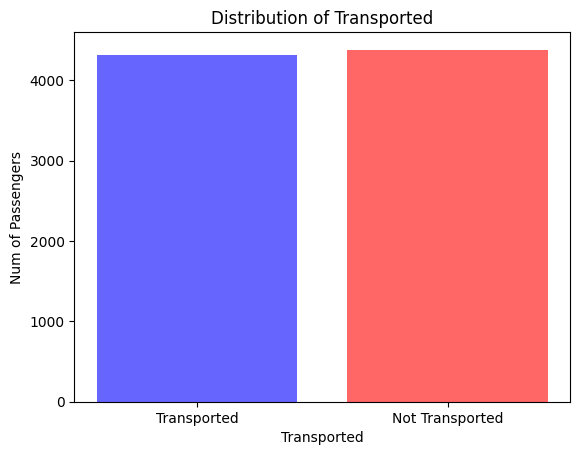

In [27]:
# Create a bar plot using Matplotlib with dimmer blue and red colors
plt.bar(train_df['Transported'].value_counts().index, train_df['Transported'].value_counts(), color=[(1, 0, 0, 0.6), (0, 0, 1, 0.6)])  # Red and blue with 50% opacity

# Set plot title and labels
plt.title('Distribution of Transported')
plt.xlabel('Transported')
plt.ylabel('Num of Passengers')

# Customize x-axis ticks and labels
plt.xticks(train_df['Transported'].value_counts().index, ['Not Transported', 'Transported'])

# Show the plot
plt.show()


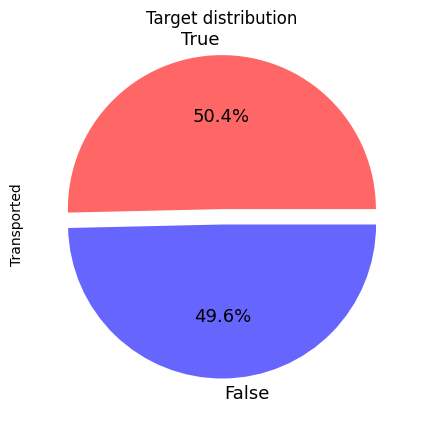

In [31]:
# Set colors
colors = [(1, 0, 0, 0.6), (0, 0, 1, 0.6)]

# Set explode values to emphasize "Transported" category
explode = [0.1, 0]

# Figure size
plt.figure(figsize=(5, 5))

# Pie plot
train_df['Transported'].value_counts().plot.pie(explode=explode,
                                                autopct='%1.1f%%',
                                                colors=colors,
                                                textprops={'fontsize': 13}).set_title("Target distribution")

# Show the plot
plt.show()


**Numerical** **Variables**

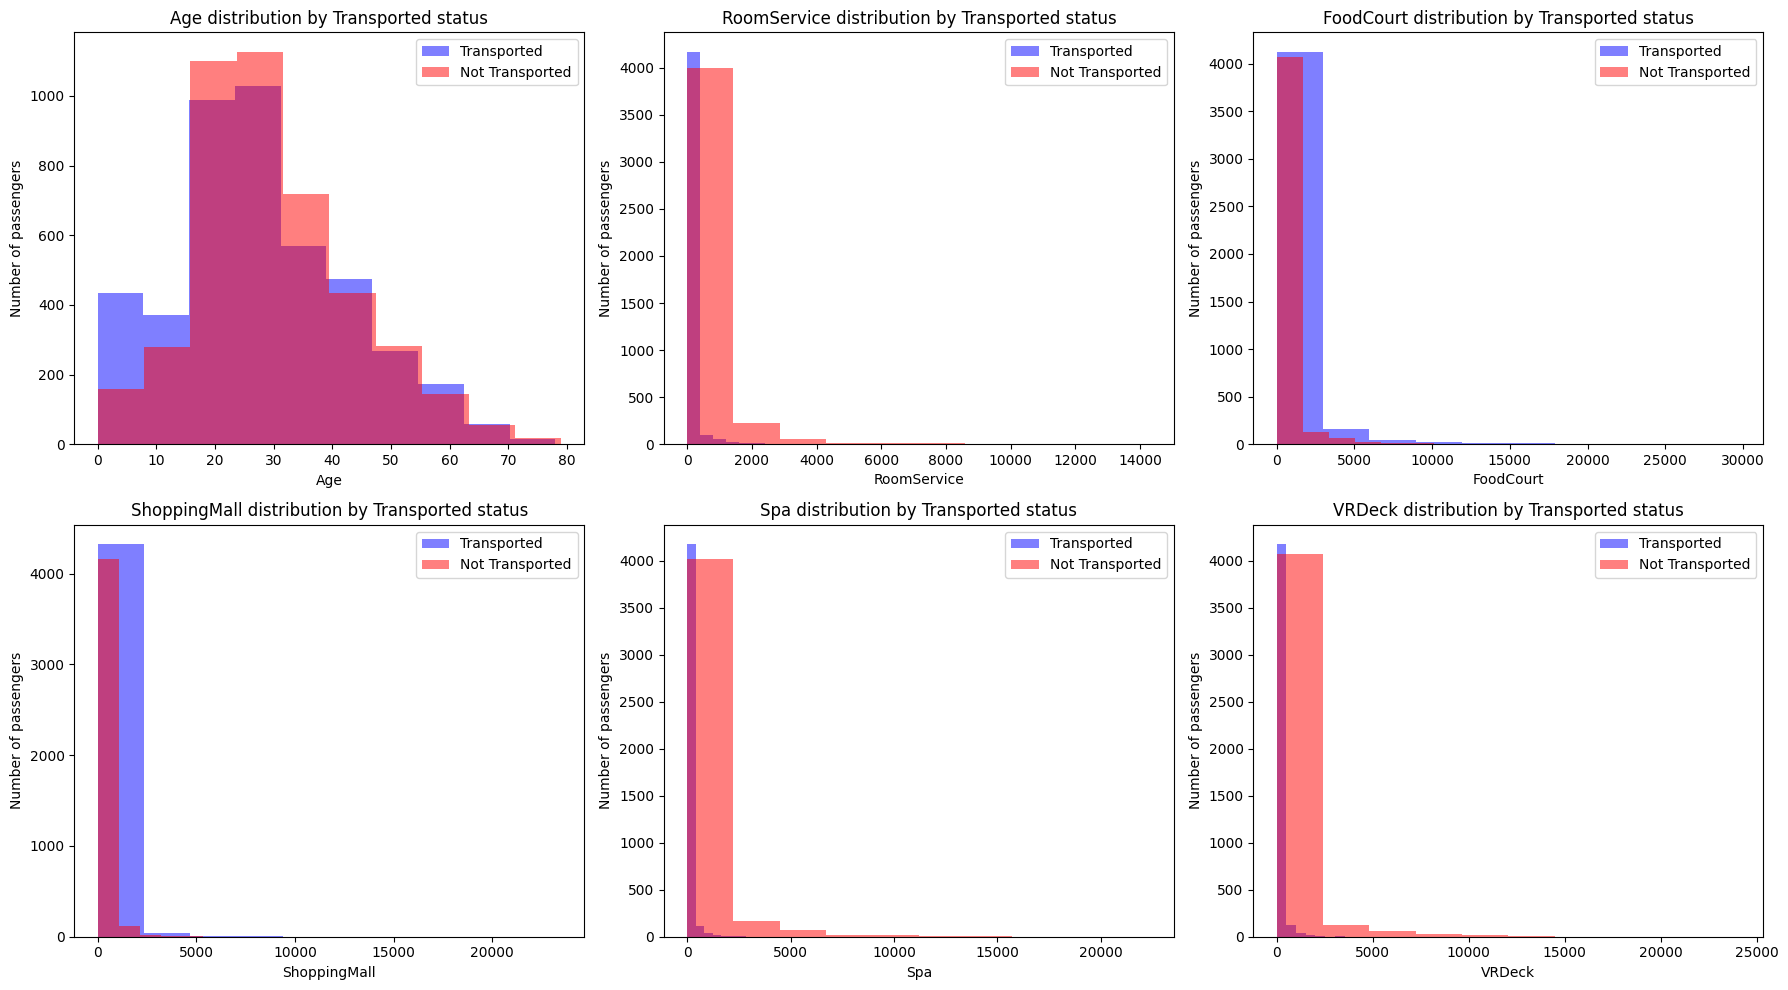

In [21]:
# Set up figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']):
    # Filter data for passengers who were transported and those who were not
    transported_passengers = train_df[train_df['Transported'] == True]
    not_transported_passengers = train_df[train_df['Transported'] == False]

    # Plot histogram for transported passengers
    axes[i].hist(transported_passengers[column], alpha=0.5, label='Transported', color='blue')

    # Plot histogram for not transported passengers
    axes[i].hist(not_transported_passengers[column], alpha=0.5, label='Not Transported', color='red')

    # Set x-axis label
    axes[i].set_xlabel(column)

    # Set y-axis label
    axes[i].set_ylabel('Number of passengers')

    # Set title
    axes[i].set_title(f'{column} distribution by Transported status')

    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


**Categorical Variables**

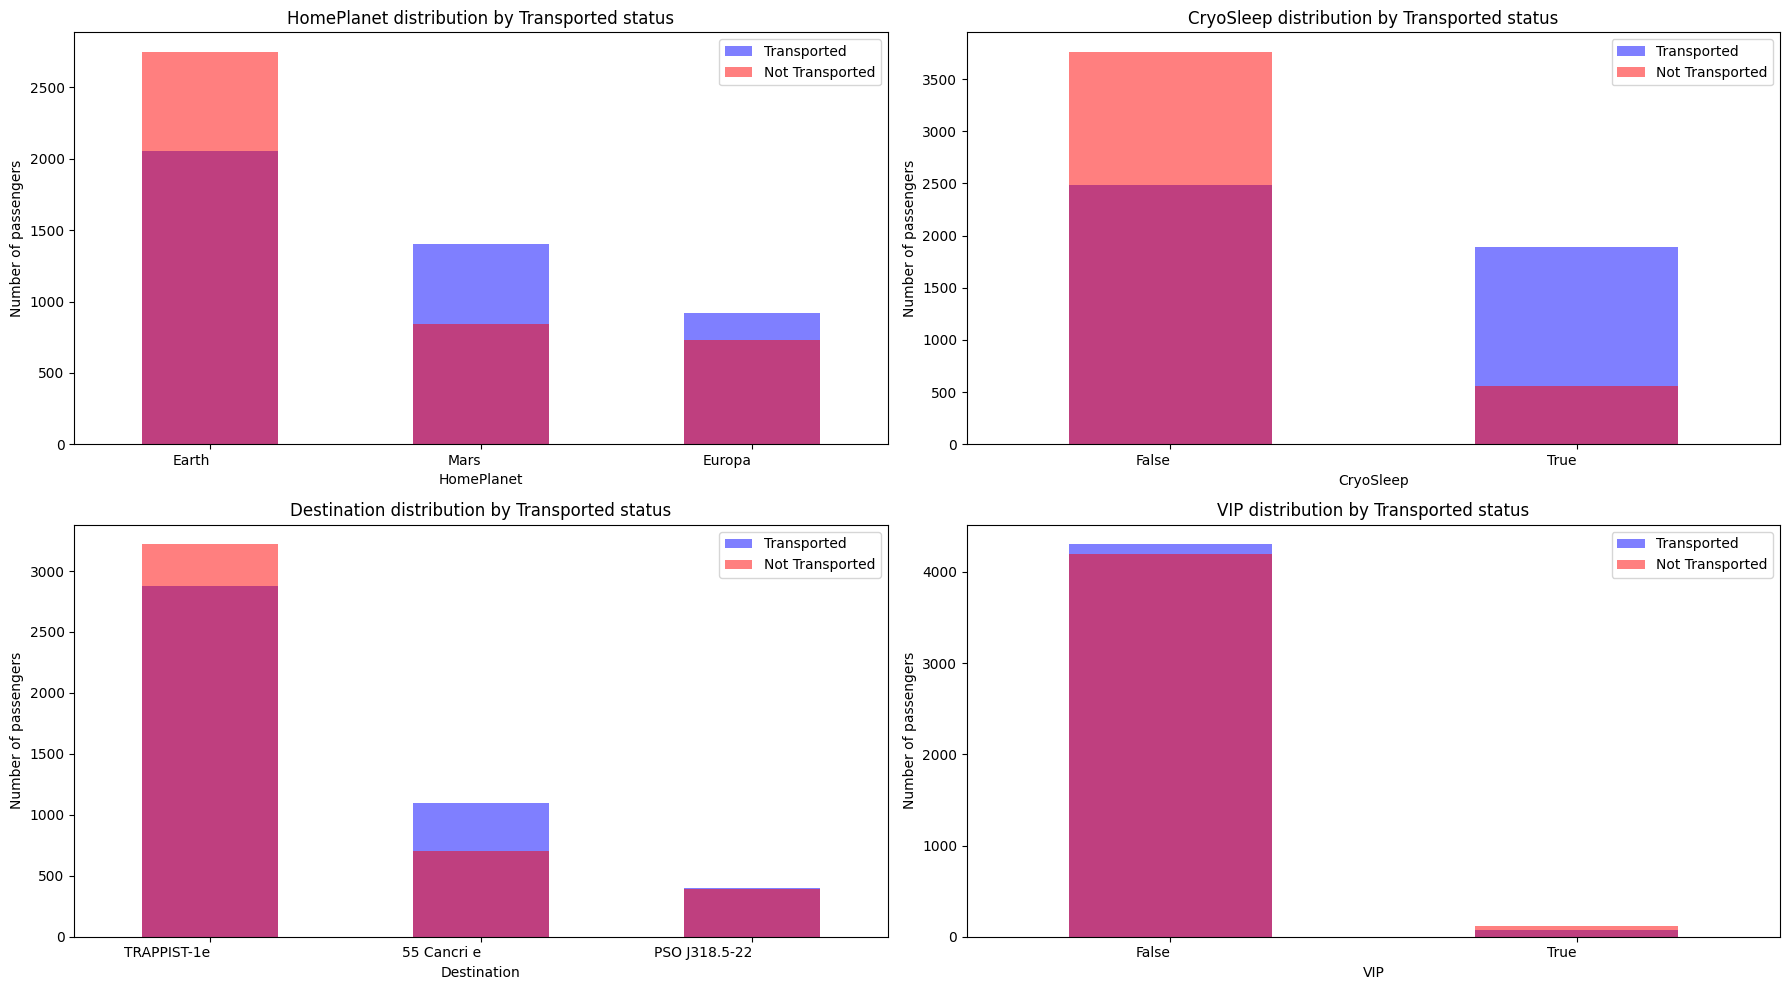

In [40]:
# Set up figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate over each column and plot
for i, column in enumerate(['HomePlanet', 'CryoSleep', 'Destination', 'VIP']):
    # Plot bar plot for transported passengers
    transported_passengers[column].value_counts().plot.bar(ax=axes[i], alpha=0.5, color='blue', label='Transported')

    # Plot bar plot for not transported passengers
    not_transported_passengers[column].value_counts().plot.bar(ax=axes[i], alpha=0.5, color='red', label='Not Transported')

    # Set x-axis label
    axes[i].set_xlabel(column)

    # Set y-axis label
    axes[i].set_ylabel('Number of passengers')

    # Set title
    axes[i].set_title(f'{column} distribution by Transported status')

    # Adjust x-axis tick labels position
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=360, ha='right')

    # Add legend
    axes[i].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


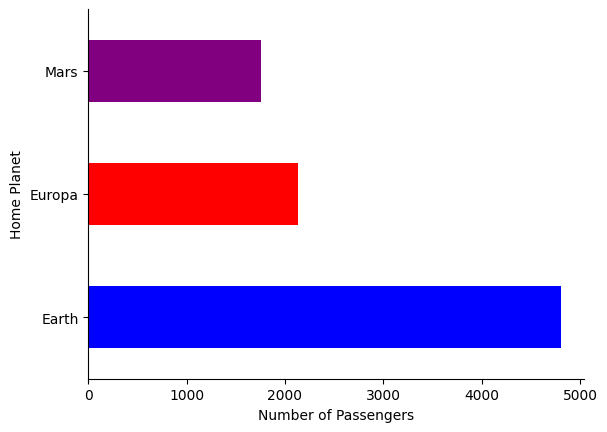

In [ ]:


# Define custom palette with blue, red, and purple colors
custom_palette = sns.color_palette(['blue', 'red', 'purple'])

# Plot Bar Chart for each home planet according to Number of Passengers
train_df.groupby('HomePlanet').size().plot(kind='barh', color=custom_palette)
plt.gca().spines[['top', 'right',]].set_visible(False)

plt.xlabel('Number of Passengers')
plt.ylabel('Home Planet')
plt.show()


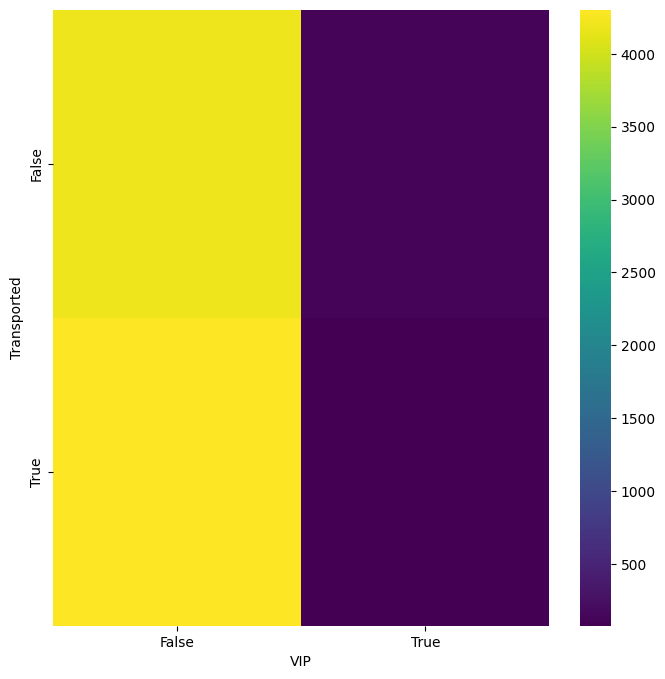

In [ ]:


plt.subplots(figsize=(8, 8))

# Create a DataFrame for 2D histogram
# This DataFrame contains the count of 'Transported' values for each 'VIP' group
df_2dhist = pd.DataFrame({
    x_label: grp['Transported'].value_counts()
    for x_label, grp in train_df.groupby('VIP')
})

# Create a heatmap using seaborn
sns.heatmap(df_2dhist, cmap='viridis')


plt.xlabel('VIP')
plt.ylabel('Transported')
_ = plt.show()


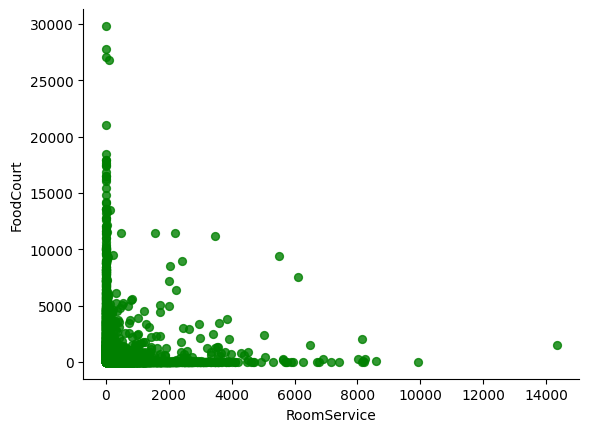

In [ ]:


# Plot a scatter plot
# 'RoomService' is plotted on the x-axis and 'FoodCourt' on the y-axis
train_df.plot(kind='scatter', x='RoomService', y='FoodCourt', s=32, alpha=.8, color='green')


plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()


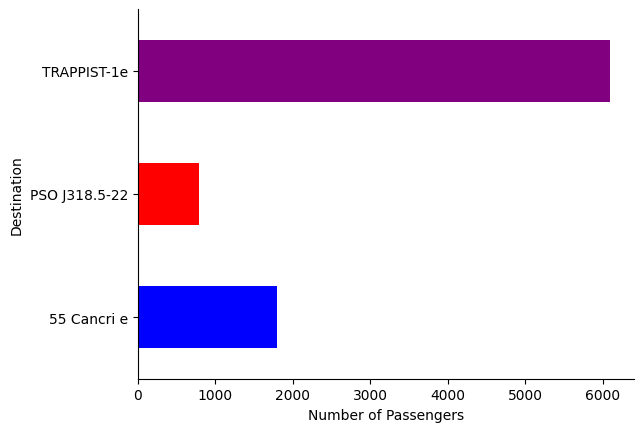

In [ ]:


# Plot horizontal bar chart for each destination with the specified colors
train_df.groupby('Destination').size().plot(kind='barh', color=['blue', 'red', 'purple'])


plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Number of Passengers')
plt.ylabel('Destination')
plt.show()


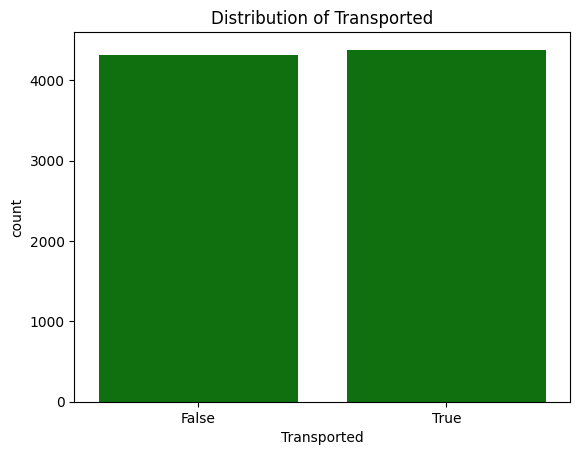

In [ ]:


# Plot a count plot to show the distribution of 'Transported'
sns.countplot(x='Transported', data=train_df, color='green')

plt.title('Distribution of Transported')
plt.show()


# **MOdel**

In [ ]:
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']

In [ ]:
X = pd.get_dummies(X)

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 01. gradient Boosting Classifier

In [ ]:
#USed Gradient boosting classifier initially

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

# 02. Logistic Regression

In [ ]:
#Trying LOGISTIC REGRESSION this time

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression Classifier
lr_classifier = LogisticRegression(random_state=42)

# Train the model on the training data
lr_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

# 03. RandomForrest Decision Tree

In [ ]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Model Prediction and performance**

# Logisitic Regression performance and results

In [ ]:
# Predict the labels for validation set for LOGISTIC REGRESSION
y_pred_lr = lr_classifier.predict(X_val)

# Calculate the accuracy of the model
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print("Accuracy of Logistic Regression Classifier: {:.2f}%".format(accuracy_lr * 100))

Accuracy of Logistic Regression Classifier: 77.46%


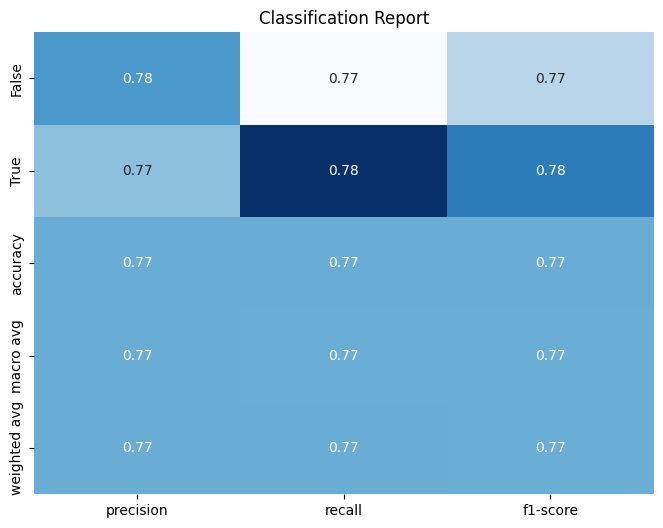

In [ ]:
report = classification_report(y_val, y_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.drop(columns=['support']), annot=True, cmap='Blues', fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()

# GradientBoosting Classifier Performance and Results

In [ ]:

# Predict the labels for validation set
y_pred_gb = gb_classifier.predict(X_val)

# Calculate the accuracy of the model
accuracy_gb = accuracy_score(y_val, y_pred_gb)
print("Accuracy of Gradient Boosting Classifier: {:.2f}%".format(accuracy_gb * 100))

Accuracy of Gradient Boosting Classifier: 78.44%


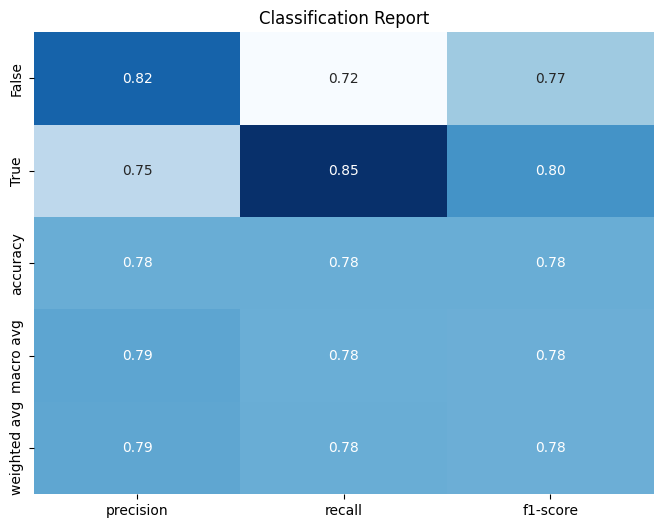

In [ ]:

report = classification_report(y_val, y_pred_gb, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.drop(columns=['support']), annot=True, cmap='Blues', fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()

# Random Forrest DecisionTree Prediction and Performance

In [ ]:
# Predict the labels for validation set
y_pred_val = model.predict(X_val)



In [ ]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

       False       0.80      0.78      0.79       861
        True       0.79      0.80      0.80       878

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [ ]:
print("Accuracy:", accuracy_score(y_val, y_pred_val))

Accuracy: 0.7912593444508338


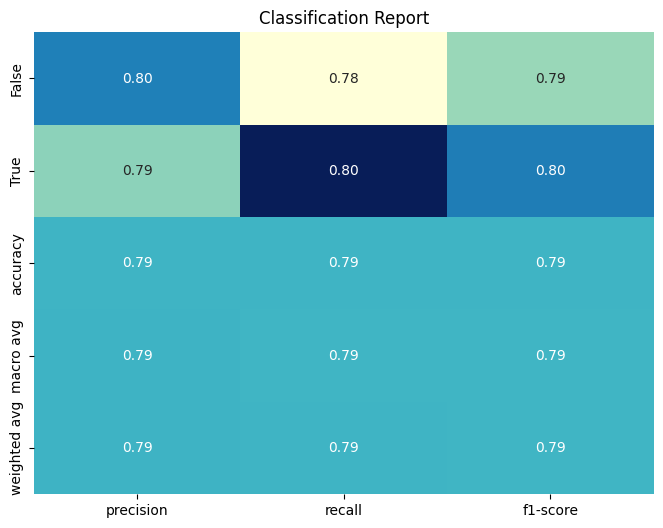

In [ ]:
report = classification_report(y_val, y_pred_val, output_dict=True)
report_df = pd.DataFrame(report).transpose()
plt.figure(figsize=(8, 6))
sns.heatmap(report_df.drop(columns=['support']), annot=True, cmap='YlGnBu', fmt=".2f", cbar=False)
plt.title('Classification Report')
plt.show()

# **Testing the Test dataset**
# **Submission for Kaggle Challenge**

In [ ]:
test_url = 'https://raw.githubusercontent.com/7PAM2015-0105-2023-TEAM17/Kaggle-Challenge-Team-17/main/test.csv'

test_df = pd.read_csv(test_url)
#submission_id = test_df['PassengerId']

In [ ]:
submission_id = test_df['PassengerId']

# Preprocessing steps
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0], inplace=True)
test_df['Cabin'].fillna('Unknown', inplace=True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0], inplace=True)
test_df['RoomService'].fillna(test_df['RoomService'].median(), inplace=True)
test_df['FoodCourt'].fillna(test_df['FoodCourt'].median(), inplace=True)
test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].median(), inplace=True)
test_df['Spa'].fillna(test_df['Spa'].median(), inplace=True)
test_df['VRDeck'].fillna(test_df['VRDeck'].median(), inplace=True)
test_df.drop(columns=['Name'], inplace=True)

test_df = pd.get_dummies(test_df)

missing_columns = set(X.columns) - set(test_df.columns)
for column in missing_columns:
    test_df[column] = 0

test_df = test_df[X.columns]
predictions = model.predict(test_df)
n_predictions = (predictions > 0.5).astype(bool)

output = pd.DataFrame({'PassengerId': submission_id, 'Transported': n_predictions.squeeze()})


Streaming output truncated to the last 5000 lines.
<ipython-input-38-f3bfb686cdf5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[column] = 0
<ipython-input-38-f3bfb686cdf5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_df[column] = 0
<ipython-input-38-f3bfb686cdf5>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

In [ ]:
output = pd.DataFrame({'PassengerId': submission_id, 'Transported': n_predictions.squeeze()})

In [ ]:
output.to_csv('submissionwith RFDT.csv', index=False)
output.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


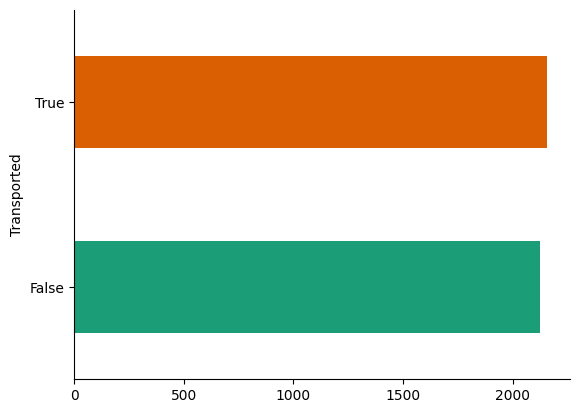

In [ ]:

output.groupby('Transported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)